<b>Name: Aishwarya Bhavsar<b><br>
<b>CSULB ID: 029371509<b><br>
<b>CECS 551 - Assignment 5<b><br>

<b>Design neural networks to classify hand written numbers using keras library, however,do not include convolutional layers.<b>



<font color='red'><b>(a) Design neural networks and implement them.<b></font> <br>

• Find Assignment 5 mnist.ipynb and mnist.zip.<br>
• train X and test X are list of intensities in 8-bit gray scale of 28 × 28 images.<br>
• train y and test y are list of integers which are the classes of the corresponding images.<br>
• The objective of the networks is classifying images into 0 to 9

**Import Libraries**

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras import  backend as K


**Import & Load Dataset**<br>
<b>Count the number of Unique train & test labels.<b>

In [15]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


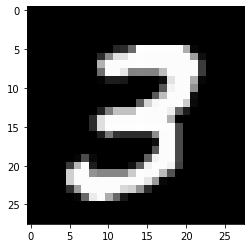

3


In [16]:
import matplotlib.pyplot as plt
import numpy as np

id = 7

image = np.array(x_train[id], dtype='float')
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

# print(X_train[id])
print(y_train[id])

**Import keras libraries and packages**

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

**Compute the number of labels**

In [19]:
# compute the number of labels
num_labels = len(np.unique(y_train))

<b>One Hot Encoding <br> <br>One Hot Encoding is a common way of preprocessing categorical features for machine learning models.<br> This type of encoding creates a new binary feature for each possible category and assigns a value of 1 to the feature of each sample that corresponds to its original category. <b>

In [20]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

<b>Resize & Normalize<b><br>
We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.<br>

We do not know the best way to scale the pixel values for modeling, but we know that some scaling will be required.<br>

A good starting point is to normalize the pixel values of grayscale images, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.



In [22]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

<font color='red'><b>(b) Split the training dataset into sub training and validation sets randomly.<b></font> <br><br> Use 1/6 of training dataset as validation set. Use the ‘accuracy’ as metric. Please repeat 10 times of random split for each hyper-parameters and architecture, and aggregate (average) the accuracy.<b>

<b>Splitting of dataset : Validation set = 1/6th of training data<b>

In [23]:
from sklearn.model_selection import train_test_split
x_subtrain, x_valid, y_subtrain, y_valid = train_test_split(x_train, y_train, test_size=0.16,random_state=42)


<font color='red'><b>(c) Optimizer evaluation<b></font> <br><br>
• Implement a neural network which has single hidden layer with 32 units. Using the network, find best hyper-parameters of the following optimizers; SGD,RMSprop, Adam, Adagrad.<br>
• Train the network with the training dataset (not sub training) with the best
hyper-parameters of each optimizer.<br>
• For each optimizer, report test accuracy using the test dataset.<b>

<b> 1. Train Model using <font color = 'blue'>ADAM optimiser.<b> 

In [41]:
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name="Adam")
def create_model():
  model = Sequential()
  model.add(Dense(32, input_dim = num_pixels, activation = 'relu'))
  model.compile(Adam(lr=0.01), loss='binary_crossentropy',metrics=['accuracy'])
  return model

<b>Compile the model using ADAM Optimiser<b>

In [53]:
batch_size = 256
hidden_units = 32
dropout = 0.4
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('softmax'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 activation_7 (Activation)   (None, 32)                0         
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
 activation_8 (Activation)   (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


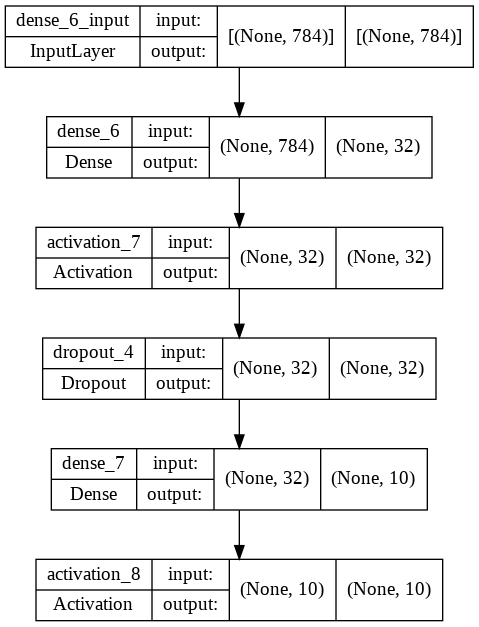

In [55]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [56]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 1.9927 - accuracy: 0.4552
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 1.6158 - accuracy: 0.5239
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 1.4356 - accuracy: 0.5349
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 1.3502 - accuracy: 0.5479
Epoch 5/10
235/235 [==============================] - 1s 6ms/step - loss: 1.2819 - accuracy: 0.5633
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 1.2173 - accuracy: 0.5808
Epoch 7/10
235/235 [==============================] - 1s 6ms/step - loss: 1.1837 - accuracy: 0.5886
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1530 - accuracy: 0.5935
Epoch 9/10
235/235 [==============================] - 1s 6ms/step - loss: 1.1306 - accuracy: 0.5992
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 1.1114 - accuracy: 0.6077

<b>Model Evaluation - Training Set<b>

In [57]:
#By changing the batch size from 128 to 256 and reducing the dropout rate from 0.45 to 0.4 we are able to gain an accuracy of 90.91%
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.6573 - accuracy: 0.9061
Accuracy: 90.61


<b>Model Evaluation - Testing Set<b>

In [58]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.6553 - accuracy: 0.9008
Accuracy: 90.08


<b> 2. Train Model using <font color = 'blue'>ADAGRAD optimiser.<b>

In [62]:
from keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1, epsilon=1e-07, name="Adagrad")
def create_model():
  model = Sequential()
  model.add(Dense(32, activation='relu'))
  model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
  return model

In [63]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 activation_9 (Activation)   (None, 32)                0         
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


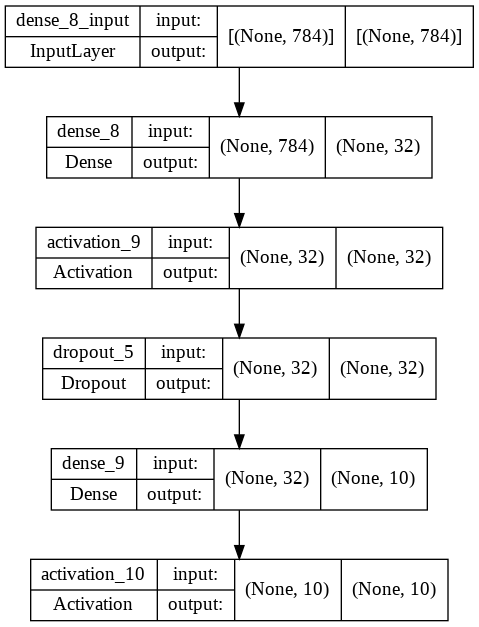

In [64]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using ADAGRAD Optimiser<b>

In [75]:
batch_size = 256
hidden_units = 32
dropout = 0.3
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])


In [76]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
235/235 [==============================] - 1s 4ms/step - loss: 2.1936 - accuracy: 0.2356
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 1.9254 - accuracy: 0.4129
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 1.7229 - accuracy: 0.5056
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 1.5558 - accuracy: 0.5660
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 1.4254 - accuracy: 0.6054
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 1.3211 - accuracy: 0.6306
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 1.2357 - accuracy: 0.6567
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1711 - accuracy: 0.6709
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 1.1201 - accuracy: 0.6840
Epoch 10/10
235/235 [==============================] - 1s 4ms/step - loss: 1.0701 - accuracy: 0.6983

<b>Model Evaluation - Training Set<b>

In [77]:

#We can increase the accuracy using relu and softmax activation functions.
#Similarly, by decreasing the dropout rate from 0.45 to 0.3 and increasing the batch size from 128 to 256, accuracy of 82.50% is achieved.
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.8830 - accuracy: 0.8250
Accuracy: 82.50


<b>Model Evaluation - Testing Set<b>

In [78]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.8635 - accuracy: 0.8302
Accuracy: 83.02


<b> 3. Train Model using <font color = 'blue'>SGD optimiser.<b>

In [85]:
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD
tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD")
def create_model():
  model3 = Sequential()
  model3.add(Dense(32, activation='softmax'))
  model3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
  return model

In [86]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                25120     
                                                                 
 activation_19 (Activation)  (None, 32)                0         
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
 activation_20 (Activation)  (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


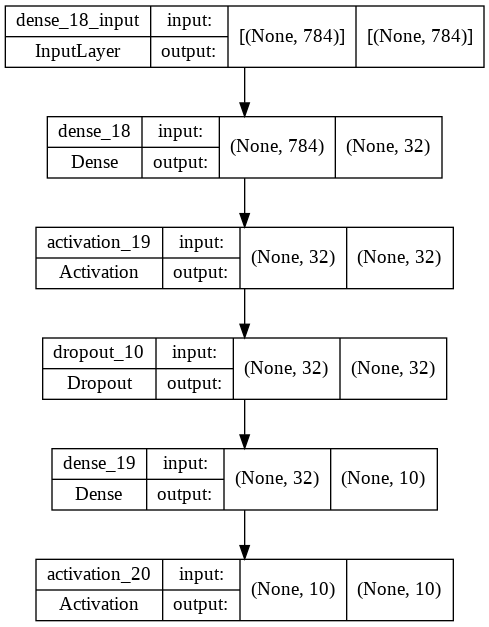

In [87]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using SGD Optimiser<b>

In [103]:
batch_size = 412
hidden_units = 32
dropout = 0.45
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('tanh'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [104]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
146/146 [==============================] - 1s 5ms/step - loss: 1.8383 - accuracy: 0.4064
Epoch 2/10
146/146 [==============================] - 1s 7ms/step - loss: 1.2641 - accuracy: 0.6795
Epoch 3/10
146/146 [==============================] - 1s 7ms/step - loss: 1.0371 - accuracy: 0.7389
Epoch 4/10
146/146 [==============================] - 1s 7ms/step - loss: 0.9103 - accuracy: 0.7639
Epoch 5/10
146/146 [==============================] - 1s 6ms/step - loss: 0.8272 - accuracy: 0.7840
Epoch 6/10
146/146 [==============================] - 1s 5ms/step - loss: 0.7659 - accuracy: 0.7972
Epoch 7/10
146/146 [==============================] - 1s 6ms/step - loss: 0.7216 - accuracy: 0.8074
Epoch 8/10
146/146 [==============================] - 1s 6ms/step - loss: 0.6880 - accuracy: 0.8161
Epoch 9/10
146/146 [==============================] - 1s 4ms/step - loss: 0.6616 - accuracy: 0.8212
Epoch 10/10
146/146 [==============================] - 1s 6ms/step - loss: 0.6335 - accuracy: 0.8268

<b>Model Evaluation - Training Set<b>

In [105]:
#Batch size changed from 128 to 412.
#tanh and softmax activation function used for the layer.
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.4980 - accuracy: 0.8784
Accuracy: 87.84


<b>Model Evaluation - Testing Set<b>

In [106]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.4796 - accuracy: 0.8846
Accuracy: 88.46


<b> 4. Train Model using <font color = 'blue'>RMSprop optimiser.<b>

In [108]:
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
tf.keras.optimizers.RMSprop(learning_rate=0.005, rho=0.2, momentum=0.9, epsilon=1e-07, centered=False, name="RMSprop")
def create_model():
  model = Sequential()
  model.add(Dense(32, activation='relu'))
  model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
  return model

In [109]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                25120     
                                                                 
 activation_35 (Activation)  (None, 32)                0         
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_35 (Dense)            (None, 10)                330       
                                                                 
 activation_36 (Activation)  (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


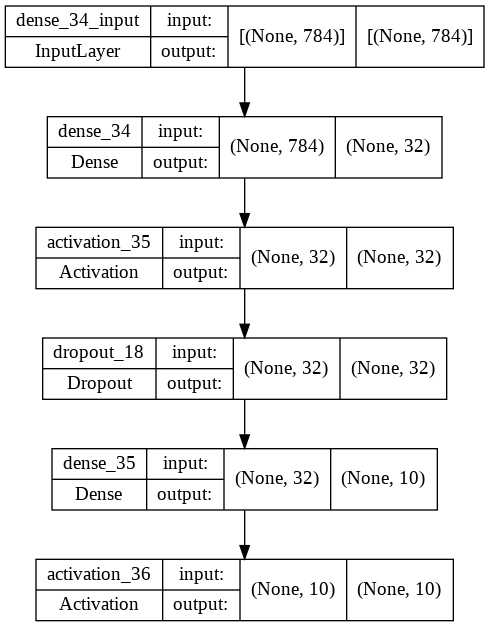

In [110]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

<b>Compile the model using RMSprop Optimiser<b>

In [118]:
batch_size = 540
hidden_units = 32
dropout = 0.3
# model is a 1-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('softmax'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [119]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Epoch 1/10
112/112 [==============================] - 1s 8ms/step - loss: 2.0965 - accuracy: 0.4639
Epoch 2/10
112/112 [==============================] - 1s 12ms/step - loss: 1.8762 - accuracy: 0.5217
Epoch 3/10
112/112 [==============================] - 2s 14ms/step - loss: 1.7306 - accuracy: 0.5779
Epoch 4/10
112/112 [==============================] - 1s 12ms/step - loss: 1.5989 - accuracy: 0.6152
Epoch 5/10
112/112 [==============================] - 1s 11ms/step - loss: 1.4861 - accuracy: 0.6518
Epoch 6/10
112/112 [==============================] - 1s 13ms/step - loss: 1.3821 - accuracy: 0.6750
Epoch 7/10
112/112 [==============================] - 1s 13ms/step - loss: 1.2821 - accuracy: 0.6920
Epoch 8/10
112/112 [==============================] - 1s 12ms/step - loss: 1.1942 - accuracy: 0.7023
Epoch 9/10
112/112 [==============================] - 1s 13ms/step - loss: 1.1193 - accuracy: 0.7103
Epoch 10/10
112/112 [==============================] - 1s 12ms/step - loss: 1.0564 - accurac

<b>Model Evaluation - Training Set<b>

In [120]:
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.8079 - accuracy: 0.9253
Accuracy: 92.53


<b>Model Evaluation - Testing Set<b>

In [121]:
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.8079 - accuracy: 0.9232
Accuracy: 92.32


<b><font color='red'>(d) Architecture evaluation<b></font><br><br>
• Pick the best optimizer and it’s hyper-parameters from the previous part.<br>
• Using sub training and validation datasets, find the best architecture in terms of the number of layers, the number of units, and activation functions.<br>
• Report 3 best architectures in terms of test accuracy. Please include architecture diagram as shown in Figure 1.

<table>
         <tr>
            <th>Optimisers</th>
            <th>Training Accuracy</th>
            <th>Testing Accuracy</th>
         </tr>
</table>   
<table>
         <tr>
            <th>Adam</th>
            <th>90.68%</th>
            <th>90.08%</th>
         </tr>
</table> 
<table>
         <tr>
            <th>Adagrad</th>
            <th>82.50%</th>
            <th>83.02%</th>
         </tr>
</table>    
<table>    
         <tr>
            <th>SGD</th>
            <th>87.84%</th>
            <th>88.46%</th>
         </tr>
</table>
<table>
         <tr>
            <th>RMSprop</th>
            <th>92.53%</th>
            <th>92.32%</th>
         </tr>
</table>


<Font color='red'><b>Best Optimiser For Architecture Evaluation 2 is RMSprop</font></b><br>
    <font color='blue'>Hyper parameters used for RMSprop </font><br>
    1.learning_rate=0.005, <br>
    2.rho=0.2,<br>
    3.momentum=0.9, <br>
    4.epsilon=1e-07,<br>
    5.centered=False <br>
    6.Batch Size : 540 <br>
    7.Dropout: 0.3 <br>
    8.Activation Function : Softmax

<font color = 'red'><b>Architecture 2 Diagram</font><b>

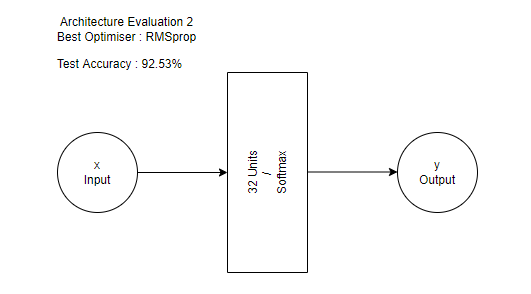